# Car Price Predictor with Machine Learning

##  Setup and loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = r"..\Datasets\car data.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

## Understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# no of rows and cols in the dataset
df.shape

(301, 9)

In [8]:
df.head() # top five rows of the dataframe

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# bottom 5 rows of the dataset
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [10]:
# random rows from the dataset 
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
229,i20,2012,3.10,6.79,52132,Diesel,Dealer,Manual,0
187,Honda CB twister,2013,0.25,0.51,32000,Petrol,Individual,Manual,0
227,i10,2011,2.55,4.43,57000,Petrol,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
40,baleno,2016,5.85,7.87,24524,Petrol,Dealer,Automatic,0


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
# checking the null values of each cols 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Data Cleaning

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
#  Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [16]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'driven_kms',
       'fuel_type', 'selling_type', 'transmission', 'owner'],
      dtype='object')

In [17]:
# Trim strings and fix dtypes where needed
for c in ['car_name', 'fuel_type', 'selling_type', 'transmission']:
    df[c] = df[c].astype(str).str.strip()



In [18]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'driven_kms',
       'fuel_type', 'selling_type', 'transmission', 'owner'],
      dtype='object')

In [19]:
# Handle missing values
# Dataset typically has no NAs, but we assert:
df = df.dropna()


In [20]:
# checking teh duplicate values of the dataset
df.duplicated().sum()

np.int64(2)

In [21]:
# dropping the duplicated values
df.drop_duplicates(inplace=True)

In [22]:
print(f"After dropping the duplicate values the shape of the dataset is : {df.shape} ")

After dropping the duplicate values the shape of the dataset is : (299, 9) 


In [23]:
df['car_name'].value_counts()

car_name
city                  26
corolla altis         16
verna                 14
brio                  10
fortuner              10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

## Exploratory Data Analysis (EDA)

<u><h4>***Column Descriptions :***</h4></u>

- **car_name :**  The brand/model name of the car (e.g., Swift, Fortuner, Corolla Altis).  

- **year :**  Year of manufacture of the car. Used to calculate the age of the car.  

- **selling_price :**  The price at which the car was sold/resold (in lakhs of INR).  

- **present_price :**  The current showroom price of the car when new (in lakhs of INR).  

- **driven_kms :**  Total kilometers the car has been driven.  

- **fuel_type :**  Type of fuel used by the car (Petrol, Diesel, CNG).  

- **selling_type :**  Indicates whether the car was sold by a dealer or an individual.  

- **transmission:** Transmission type of the car (Manual or Automatic).  

- **owner :**  Number of previous owners (0 = first owner, 1 = second owner, etc.).

- **car_age :**  Derived feature: Age of the car in years, calculated as `current_year - year`.  

- **Univariate Analysis**

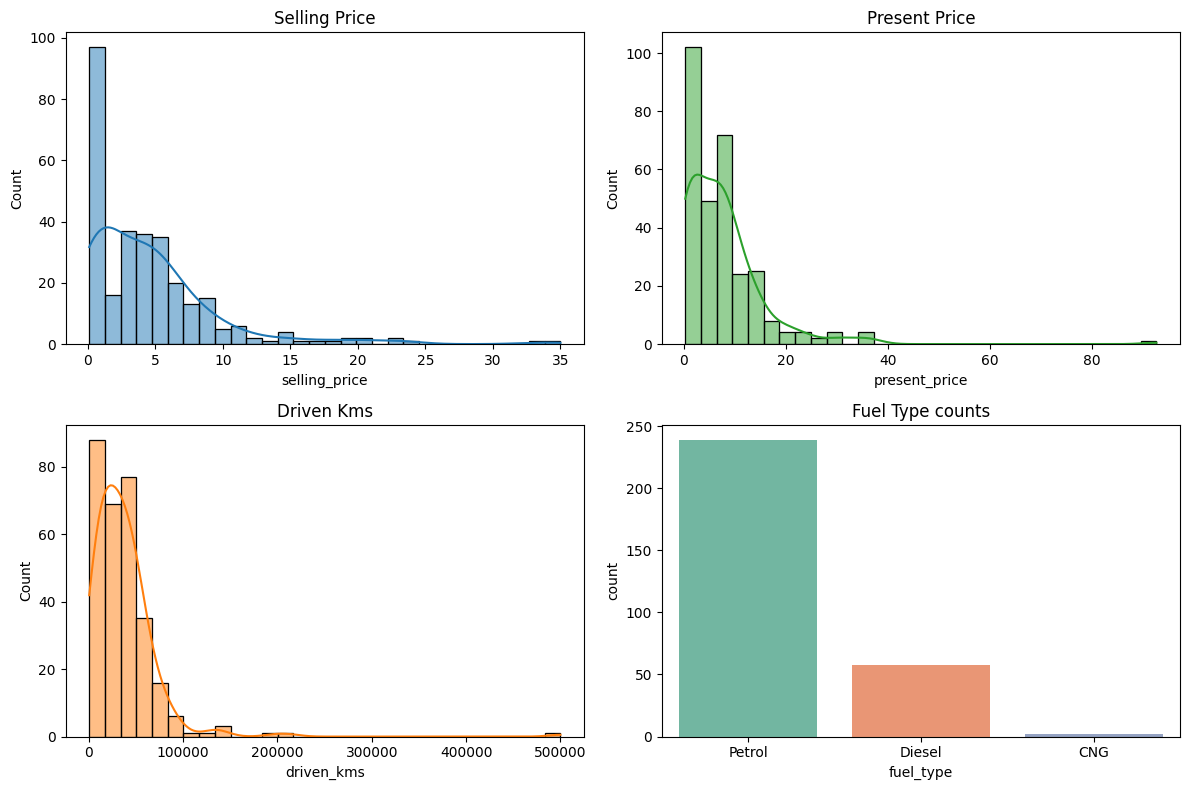

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['selling_price'], bins=30, kde=True, ax=axes[0,0], color='tab:blue')
axes[0,0].set_title('Selling Price')

sns.histplot(df['present_price'], bins=30, kde=True, ax=axes[0,1], color='tab:green')
axes[0,1].set_title('Present Price')

sns.histplot(df['driven_kms'], bins=30, kde=True, ax=axes[1,0], color='tab:orange')
axes[1,0].set_title('Driven Kms')

sns.countplot(data=df, x='fuel_type', ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Fuel Type counts')

plt.tight_layout()
plt.show()

- **Bivariate Analysis**

In [25]:
# Price vs single feature relationships

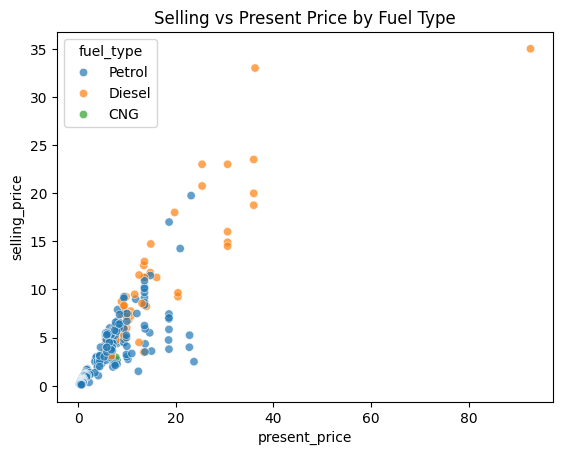

In [26]:
sns.scatterplot(data=df, x='present_price', y='selling_price', hue='fuel_type', alpha=0.7)
plt.title('Selling vs Present Price by Fuel Type')
plt.show()

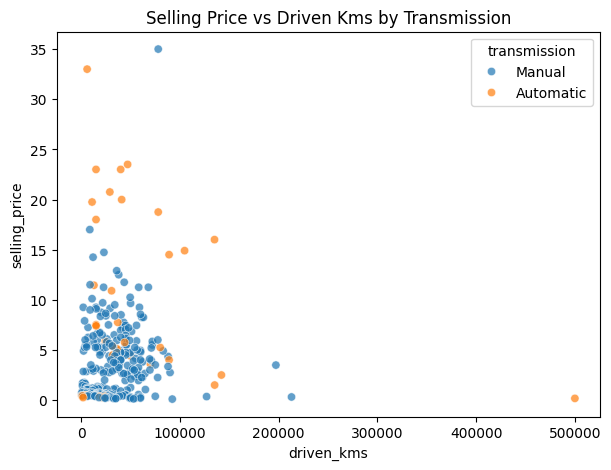

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='driven_kms', y='selling_price', hue='transmission', alpha=0.7)
plt.title('Selling Price vs Driven Kms by Transmission')
plt.show()

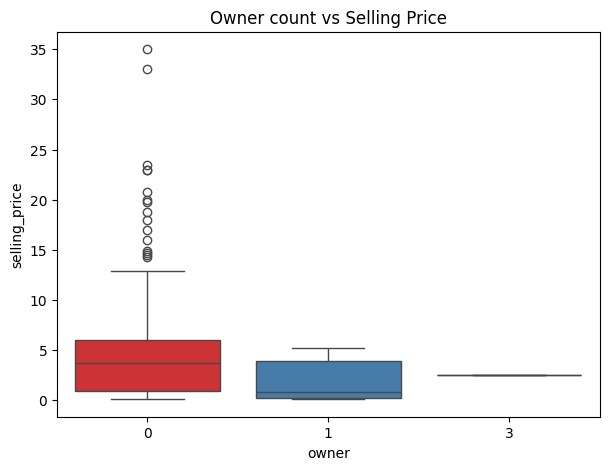

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set1')
plt.title('Owner count vs Selling Price')
plt.show()

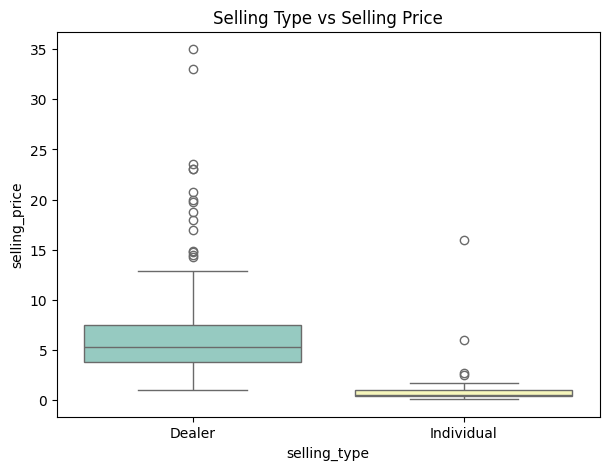

In [29]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='selling_type', y='selling_price', palette='Set3')
plt.title('Selling Type vs Selling Price')
plt.show()

In [30]:
# Create car_age column
current_year = 2025 
df['car_age'] = current_year - df['year']

# Verify
print(df[['year', 'car_age']].head())

   year  car_age
0  2014       11
1  2013       12
2  2017        8
3  2011       14
4  2014       11


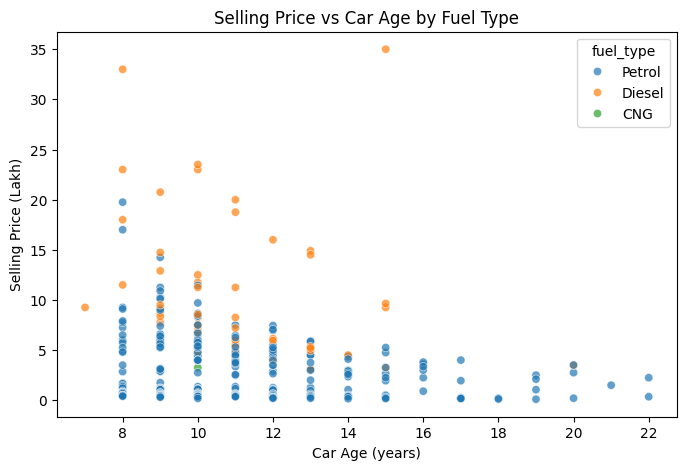

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='car_age', y='selling_price', hue='fuel_type', alpha=0.7)
plt.title('Selling Price vs Car Age by Fuel Type')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price (Lakh)')
plt.show()

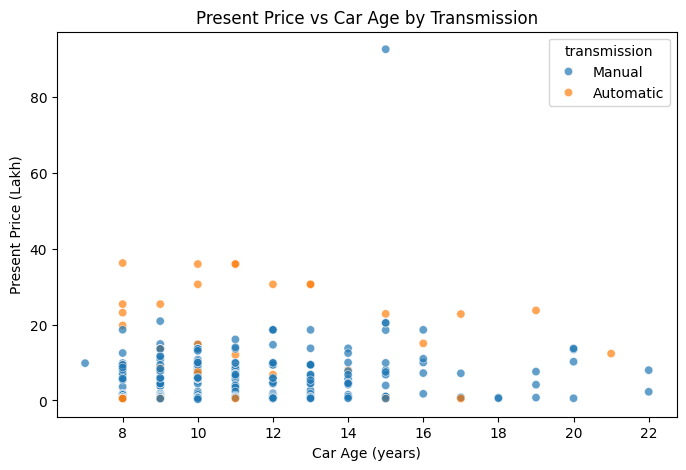

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='car_age', y='present_price', hue='transmission', alpha=0.7)
plt.title('Present Price vs Car Age by Transmission')
plt.xlabel('Car Age (years)')
plt.ylabel('Present Price (Lakh)')
plt.show()

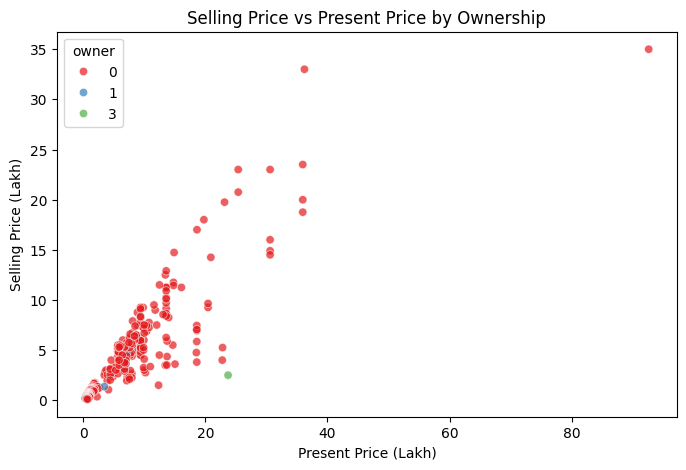

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='present_price', y='selling_price', hue='owner', palette='Set1', alpha=0.7)
plt.title('Selling Price vs Present Price by Ownership')
plt.xlabel('Present Price (Lakh)')
plt.ylabel('Selling Price (Lakh)')
plt.show()

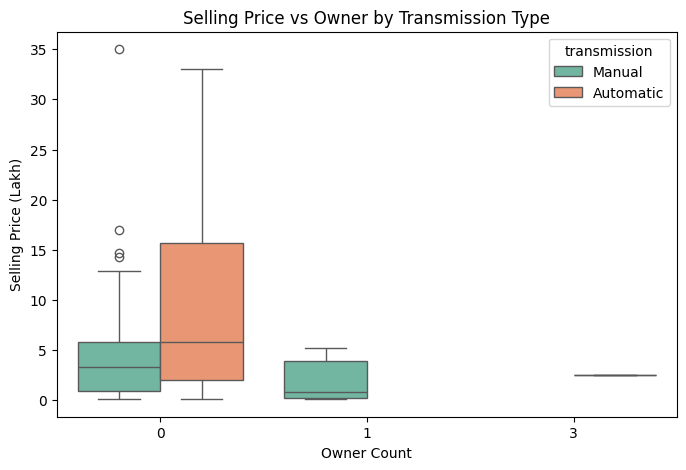

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='owner', y='selling_price', hue='transmission', palette='Set2')
plt.title('Selling Price vs Owner by Transmission Type')
plt.xlabel('Owner Count')
plt.ylabel('Selling Price (Lakh)')
plt.show()

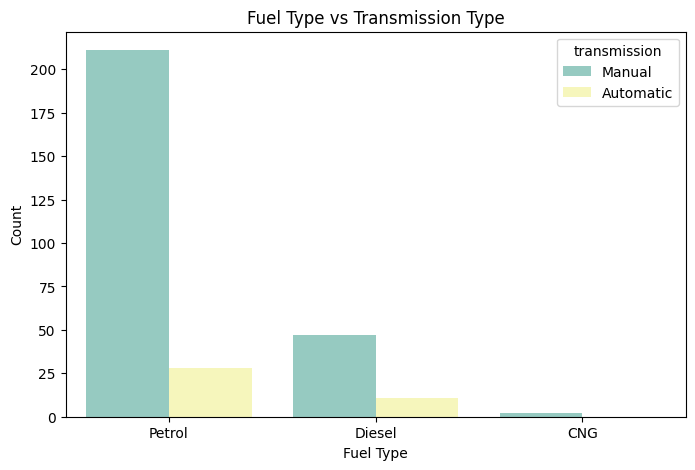

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='fuel_type', hue='transmission', palette='Set3')
plt.title('Fuel Type vs Transmission Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [36]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'driven_kms',
       'fuel_type', 'selling_type', 'transmission', 'owner', 'car_age'],
      dtype='object')

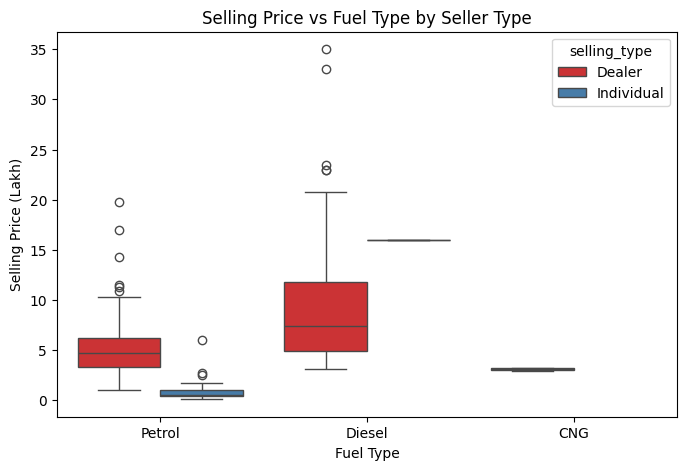

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fuel_type', y='selling_price', hue='selling_type', palette='Set1')
plt.title('Selling Price vs Fuel Type by Seller Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (Lakh)')
plt.show()

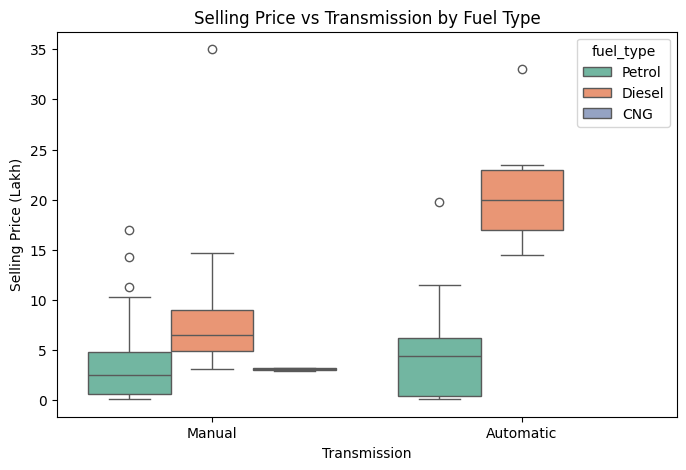

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='transmission', y='selling_price', hue='fuel_type', palette='Set2')
plt.title('Selling Price vs Transmission by Fuel Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price (Lakh)')
plt.show()

- **Multivariate Analysis**

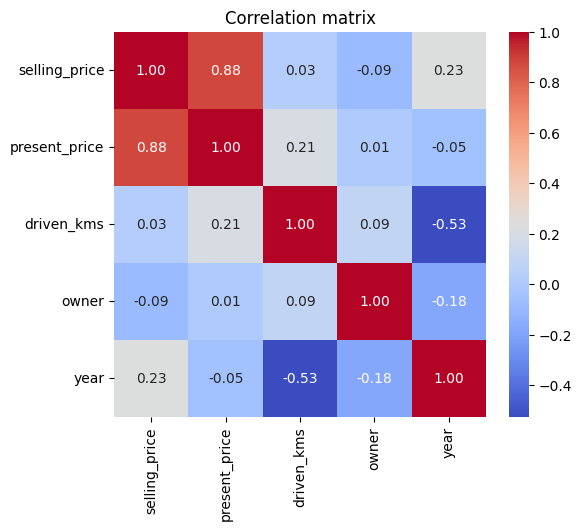

In [39]:
# Correlation matrix for numeric features
corr = df[['selling_price', 'present_price', 'driven_kms', 'owner', 'year']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()



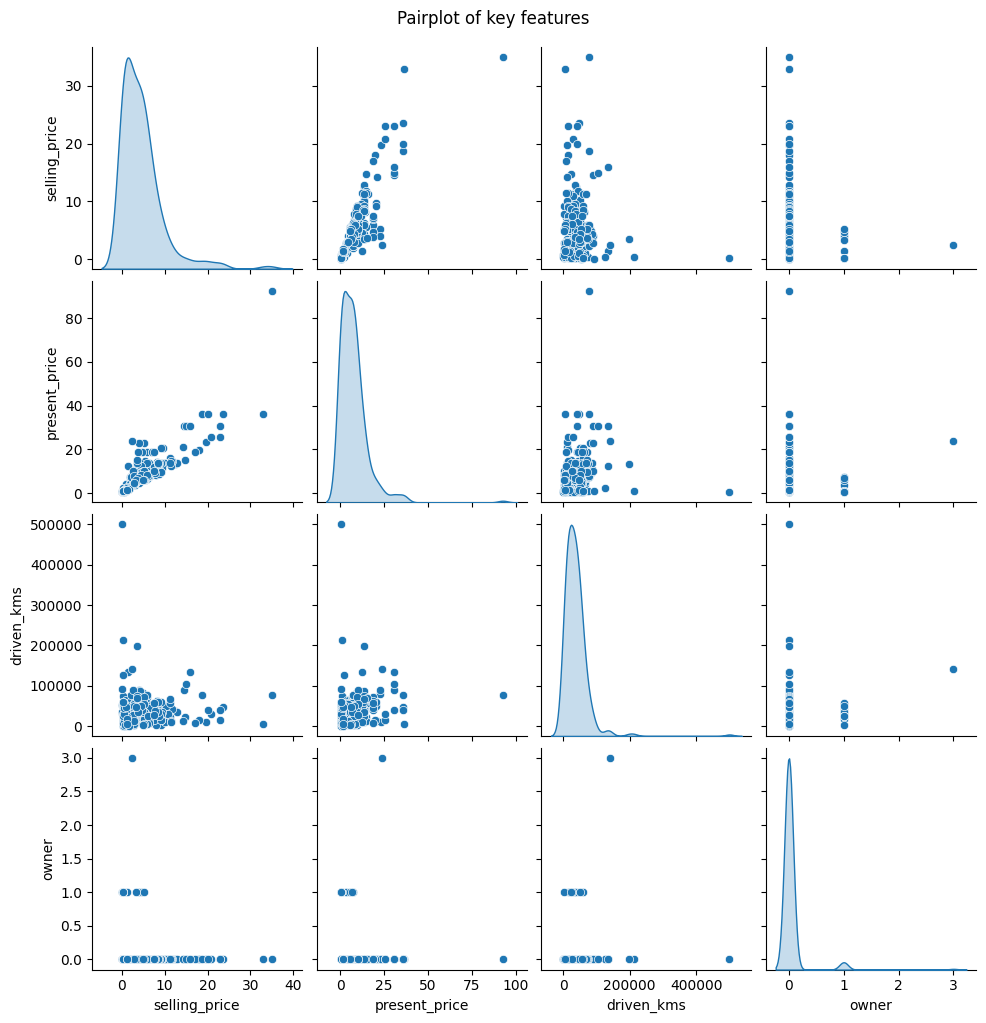

In [40]:
# Pairplot: broader relationships
sample_df = df.sample(min(300, len(df)), random_state=42)
sns.pairplot(sample_df[['selling_price', 'present_price', 'driven_kms', 'owner']], diag_kind='kde')
plt.suptitle('Pairplot of key features', y=1.02)
plt.show()


## Feature Engineering

In [41]:
df.head()

,car_name,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [42]:
df = df.drop(columns=['year', 'car_name'])

In [43]:
df

,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [44]:
df.shape

(299, 8)

In [45]:
target = 'selling_price'


In [46]:
feature_cols = [
    'present_price', 'driven_kms', 'owner', 'car_age',
    'fuel_type', 'selling_type', 'transmission',]


In [47]:
X = df[feature_cols]
y = df[target]

In [48]:
X

,present_price,driven_kms,owner,car_age,fuel_type,selling_type,transmission
0,5.59,27000,0,11,Petrol,Dealer,Manual
1,9.54,43000,0,12,Diesel,Dealer,Manual
2,9.85,6900,0,8,Petrol,Dealer,Manual
3,4.15,5200,0,14,Petrol,Dealer,Manual
4,6.87,42450,0,11,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,11.60,33988,0,9,Diesel,Dealer,Manual
297,5.90,60000,0,10,Petrol,Dealer,Manual
298,11.00,87934,0,16,Petrol,Dealer,Manual
299,12.50,9000,0,8,Diesel,Dealer,Manual


In [49]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: selling_price, Length: 299, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 7)
(60, 7)
(239,)
(60,)


In [52]:
numeric_features = ['present_price', 'driven_kms', 'owner', 'car_age']
categorical_features = ['fuel_type', 'selling_type', 'transmission',]

**Column Transformer**

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

## Model Training

**Linear Regression**

In [58]:
lin_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])


In [59]:
lin_pipe.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Random Forest**

In [60]:
rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1))
])


In [61]:
rf_pipe.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Gradient Boosting**

In [62]:
gb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])


In [63]:
gb_pipe.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Support Vector Machine**

In [64]:
svm_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])


In [66]:
svm_pipe.fit(X_train,y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Evaluation

In [76]:
def evaluate_model(name, pipe):
    pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")
    return {'mae': mae, 'rmse': rmse, 'r2': r2, 'pred': pred}



In [77]:
lin_metrics = evaluate_model("Linear Regression", lin_pipe)


Linear Regression - MAE: 1.473, RMSE: 6.373, R²: 0.753


In [78]:
lin_metrics

{'mae': 1.4725457508178557,
 'rmse': 6.373125106260665,
 'r2': 0.7527233824220502,
 'pred': array([ 7.50049519,  7.791134  ,  1.36525272,  7.00895369, 11.16501084,
         4.53381705,  8.49154086,  1.69915065,  8.82263182, -0.96326043,
        10.31787191, -0.97056227,  0.72346986,  1.5342333 ,  4.97295184,
         5.04459165,  1.2926896 ,  1.85007481, 21.5644582 ,  0.86611161,
         0.92951326,  2.44919214,  5.58016408,  0.26457568,  6.26693473,
         7.82233882,  8.68146089,  1.17319762,  4.84502493,  4.91995973,
         3.26495865,  5.48547433,  6.27517695,  2.75742504,  2.90320874,
         6.96789402,  1.26301663, -4.98759108,  1.37752814, 10.38798971,
         7.10369319,  9.03962134,  1.62594283,  4.02100293,  0.97360559,
        -2.14139679,  8.14295502,  4.3744243 ,  5.65092383, -0.59580701,
         0.66085013,  0.20426306, 10.20128223,  9.4526807 ,  7.29844635,
         6.25392698,  3.71576708,  3.43085155,  9.56250205,  9.15970379])}

In [79]:
rf_metrics  = evaluate_model("Random Forest", rf_pipe)


Random Forest - MAE: 1.501, RMSE: 12.969, R²: 0.497


In [80]:
rf_metrics

{'mae': 1.5014949999999956,
 'rmse': 12.969376066687468,
 'r2': 0.49678950398816746,
 'pred': array([ 9.441875,  8.20825 ,  0.43745 ,  6.883875, 17.71935 ,  5.3045  ,
         6.589925,  1.1895  ,  7.9445  ,  0.335125, 14.4749  ,  0.211475,
         0.250725,  0.462575,  4.399875,  5.3779  ,  0.606175,  1.178625,
        21.73745 ,  0.544525,  0.546975,  2.480625,  6.3015  ,  2.277375,
         6.20025 ,  9.120225,  9.080875,  1.151375,  4.787625,  5.321175,
         3.4285  ,  4.446125,  6.16725 ,  2.743   ,  3.251625,  6.618025,
         1.159625,  0.157525,  1.160375, 17.517225,  6.893175,  9.1891  ,
         0.921525,  3.51385 ,  0.549925,  0.19515 ,  9.799375,  4.924   ,
         3.93725 ,  0.200375,  0.587925,  0.329675, 18.079575, 10.07645 ,
         7.91295 ,  6.862125,  3.145125,  3.7075  , 10.462175,  7.402725])}

In [81]:
gb_metrics  = evaluate_model("Gradient Boosting", gb_pipe)


Gradient Boosting - MAE: 1.177, RMSE: 6.961, R²: 0.730


In [82]:
gb_metrics

{'mae': 1.1774530557035336,
 'rmse': 6.961413900777055,
 'r2': 0.7298978359528432,
 'pred': array([ 9.29275287,  8.66925358,  0.48991241,  7.14927603, 14.71690291,
         4.86270544,  5.28818984,  1.28951435,  8.6834978 ,  0.35430611,
         9.79517268,  0.20239249,  0.32185021,  0.53731361,  4.06078129,
         5.39324317,  0.68809009,  1.49097803, 22.61259442,  0.36092054,
         0.53961254,  3.02083521,  6.03537168,  1.88077704,  6.5711874 ,
         9.05704824, 10.0252347 ,  1.11131948,  4.5917298 ,  5.18733288,
         3.09482503,  4.42220601,  6.5711874 ,  2.69501714,  3.05180922,
         6.92230667,  1.14002522,  0.12602492,  1.11270185, 12.51989892,
         6.92986668,  8.99777725,  0.91113081,  3.30429607,  0.53961254,
         0.15145525,  9.91368115,  4.36142957,  4.09684414,  0.18557774,
         0.55997454,  0.2571027 , 12.55293649, 10.85918551,  8.34463723,
         6.73653778,  3.08075829,  3.74056257, 13.00393238,  7.0170939 ])}

In [83]:
svm_metrics = evaluate_model("Support Vector Machine :",svm_pipe)

Support Vector Machine : - MAE: 1.177, RMSE: 6.961, R²: 0.730


In [84]:
svm_metrics

{'mae': 1.1774530557035336,
 'rmse': 6.961413900777055,
 'r2': 0.7298978359528432,
 'pred': array([ 9.29275287,  8.66925358,  0.48991241,  7.14927603, 14.71690291,
         4.86270544,  5.28818984,  1.28951435,  8.6834978 ,  0.35430611,
         9.79517268,  0.20239249,  0.32185021,  0.53731361,  4.06078129,
         5.39324317,  0.68809009,  1.49097803, 22.61259442,  0.36092054,
         0.53961254,  3.02083521,  6.03537168,  1.88077704,  6.5711874 ,
         9.05704824, 10.0252347 ,  1.11131948,  4.5917298 ,  5.18733288,
         3.09482503,  4.42220601,  6.5711874 ,  2.69501714,  3.05180922,
         6.92230667,  1.14002522,  0.12602492,  1.11270185, 12.51989892,
         6.92986668,  8.99777725,  0.91113081,  3.30429607,  0.53961254,
         0.15145525,  9.91368115,  4.36142957,  4.09684414,  0.18557774,
         0.55997454,  0.2571027 , 12.55293649, 10.85918551,  8.34463723,
         6.73653778,  3.08075829,  3.74056257, 13.00393238,  7.0170939 ])}

In [85]:
X

,present_price,driven_kms,owner,car_age,fuel_type,selling_type,transmission
0,5.59,27000,0,11,Petrol,Dealer,Manual
1,9.54,43000,0,12,Diesel,Dealer,Manual
2,9.85,6900,0,8,Petrol,Dealer,Manual
3,4.15,5200,0,14,Petrol,Dealer,Manual
4,6.87,42450,0,11,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,11.60,33988,0,9,Diesel,Dealer,Manual
297,5.90,60000,0,10,Petrol,Dealer,Manual
298,11.00,87934,0,16,Petrol,Dealer,Manual
299,12.50,9000,0,8,Diesel,Dealer,Manual


In [86]:
X_train.columns

Index(['present_price', 'driven_kms', 'owner', 'car_age', 'fuel_type',
       'selling_type', 'transmission'],
      dtype='object')